In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv("E:\\Data Science\\fraud_check.csv")

In [3]:
data=df.copy()

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:

label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

In [6]:

label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 

In [7]:

label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [8]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["NewTaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,29000,99620], labels = ["Risky", "Good"])

In [10]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,NewTaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:

label_encoder = preprocessing.LabelEncoder()
df['NewTaxInc']= label_encoder.fit_transform(df['NewTaxInc']) 

In [12]:
y=df['NewTaxInc']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: NewTaxInc, Length: 600, dtype: int32

In [13]:
y.unique()

array([0, 1])

In [14]:
y.value_counts()

0    485
1    115
Name: NewTaxInc, dtype: int64

In [15]:
data=data.drop(['Taxable.Income'],axis=1)

In [16]:
x=data
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
x_train,x_test,y_train,x_test=train_test_split(x,y,test_size=0.2)

In [18]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [19]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

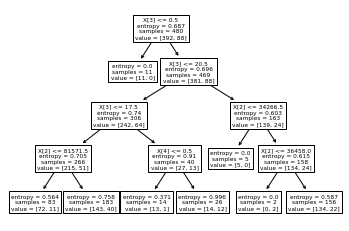

In [20]:
tree.plot_tree(model);

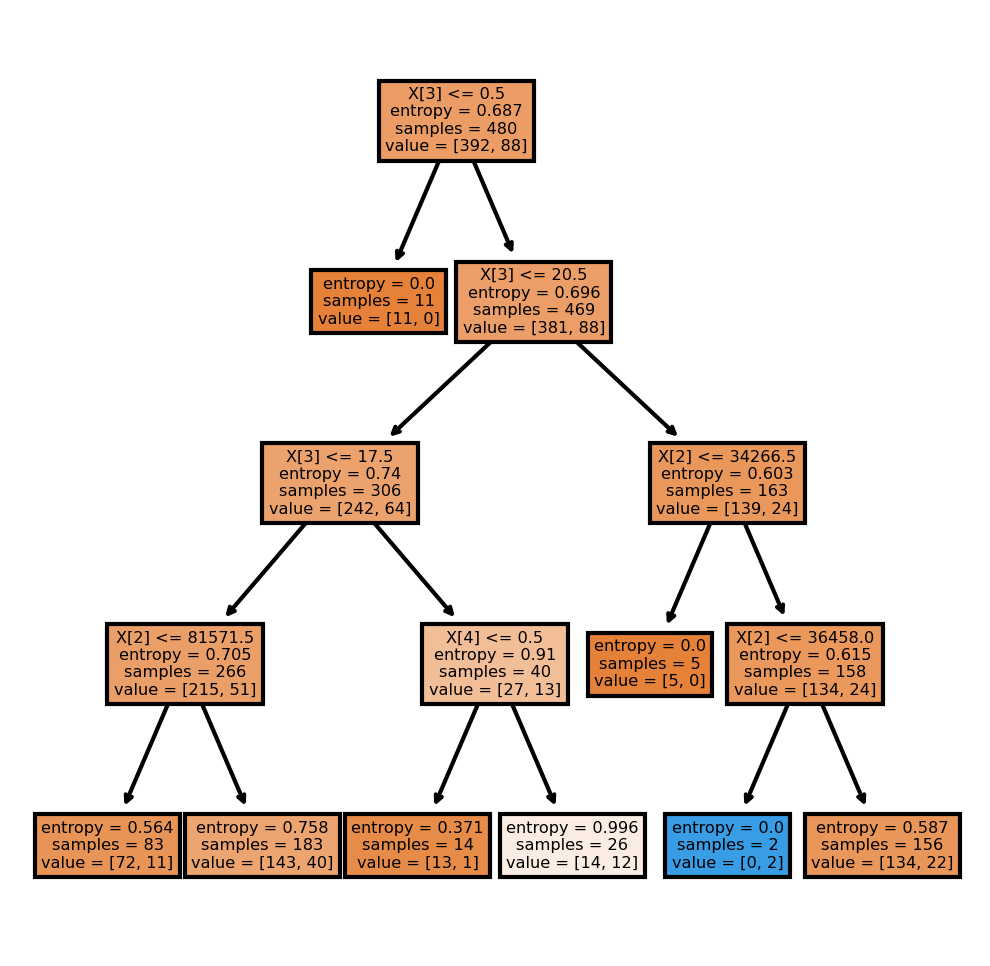

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
cn=['risky','Good']
class_name=cn
tree.plot_tree(model,filled=True);

### Building Decision Tree Classifier (CART) using Gini Criteria


In [22]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [23]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [26]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()